# Inspect SDSS DR16 Quasar Samples from Selection Criteria

In [1]:
import sys
sys.path.append("..")

from astropy.io import fits
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from lib.get_config import get_config
cfg = get_config('../config/config.yaml')

Load config file >> ../config/config.yaml


In [2]:
# BH mass equation
logmbh_eq = lambda a, b, fwhm, loglline: a + np.log10(((fwhm/1000.)**2)*((loglline - 44.)**b))

## Load catalogue of filtered samples

In [5]:
df = pd.read_csv(Path(cfg['data_dir'], 'catalogue', 'sdssdr16q_prop.csv'), sep=',', header=0)

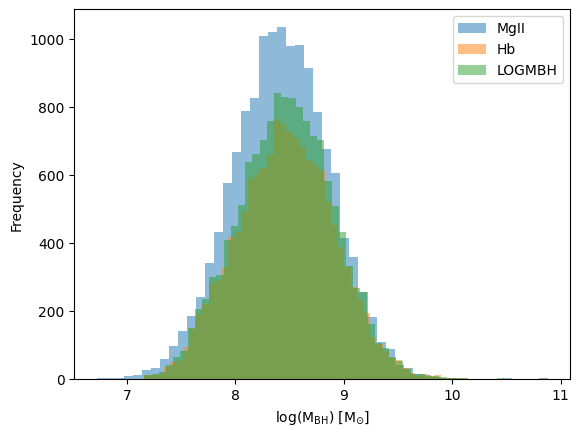

In [6]:
logmbh_hb_vestergaard06 = logmbh_eq(6.91, 0.5, df['HBETA_BR_FWHM'], df['LOGL5100'])

fig, ax = plt.subplots()
df['LOGMBH_MGII'].plot.hist(bins=50, alpha=0.5, label='MgII')
df['LOGMBH_HB'].plot.hist(bins=50, alpha=0.5, label='Hb')
df['LOGMBH'].plot.hist(bins=50, alpha=0.5)
# ax.hist(logmbh_hb_vestergaard06, bins=50, alpha=0.5, label='Hb(vestergaard)')
ax.legend()
ax.set_xlabel(r'log(M$_{\mathrm{BH}}$) [M$_{\odot}$]')
plt.show()

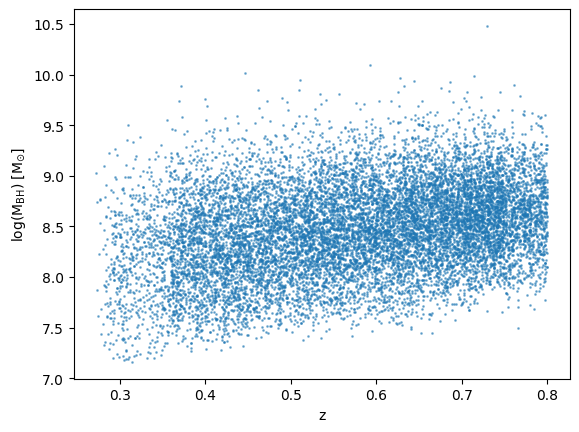

In [7]:
fig, ax = plt.subplots()
ax.scatter(df['Z_FIT'], df['LOGMBH'], s=1, alpha=0.5)
ax.set_xlabel('z')
ax.set_ylabel(r'log(M$_{\mathrm{BH}}$) [M$_{\odot}$]')
plt.show()

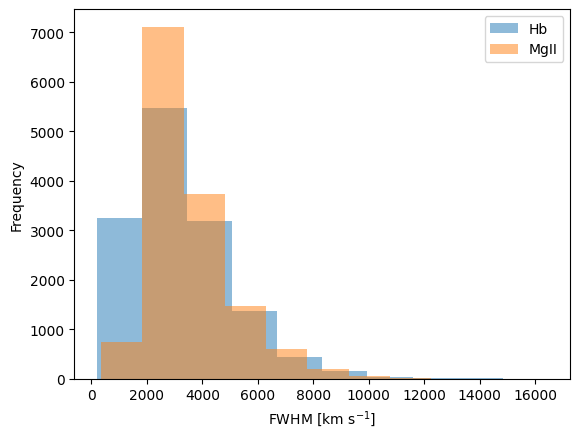

In [8]:
fig, ax = plt.subplots()
df['HBETA_FWHM'].plot.hist(alpha=0.5, label='Hb')
df['MGII_FWHM'].plot.hist(alpha=0.5, label='MgII')
ax.legend()
ax.set_xlabel(r'FWHM [km s$^{-1}$]')
plt.show()

## Selected Samples

In [9]:
from lib.dataset_sdssquasarspec import SDSSQuasarSpecDataset

/Users/sukyee/opt/miniconda3/envs/mltorch/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
# List spectra file
list_files = np.asarray([str(f) for f in Path(cfg['data_dir'], 'spectra').rglob('*.fits.gz')])

# Get latest datasplitidx file
datasplitidx_file = list(Path(cfg['data_dir'], 'logs').rglob('**/datasplitidx.pkl'))[-1]
data_idx = pd.read_pickle(datasplitidx_file)

# Get properties
df_sample = SDSSQuasarSpecDataset.get_labelbyfilename(df, path_fits=list_files)[1]
df_train = df_sample.iloc[data_idx['train']]
df_test = df_sample.iloc[data_idx['test']]

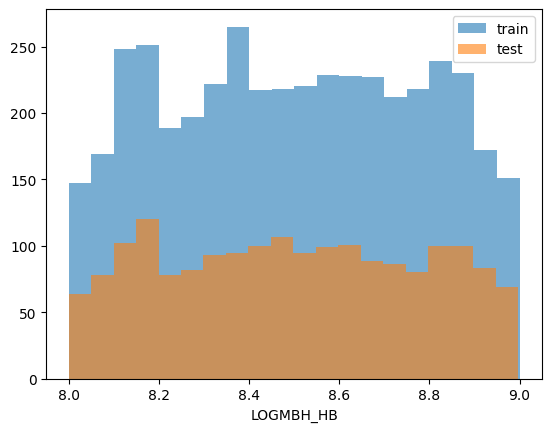

In [11]:
label_key = 'LOGMBH_HB'
fig, ax = plt.subplots()
ax.hist(df_train[label_key], bins=20, alpha=0.6, label='train')
ax.hist(df_test[label_key], bins=20, alpha=0.6, label='test')
ax.set_xlabel(label_key)
ax.legend()
plt.show()

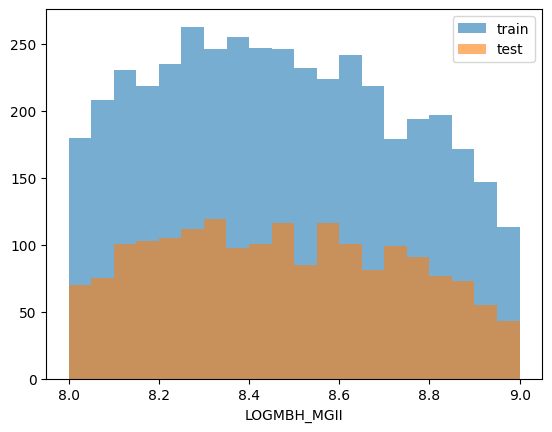

In [12]:
label_key = 'LOGMBH_MGII'
fig, ax = plt.subplots()
ax.hist(df_train[label_key], bins=20, alpha=0.6, label='train')
ax.hist(df_test[label_key], bins=20, alpha=0.6, label='test')
ax.set_xlabel(label_key)
ax.legend()
plt.show()

## Visualize Quasar Spectrum

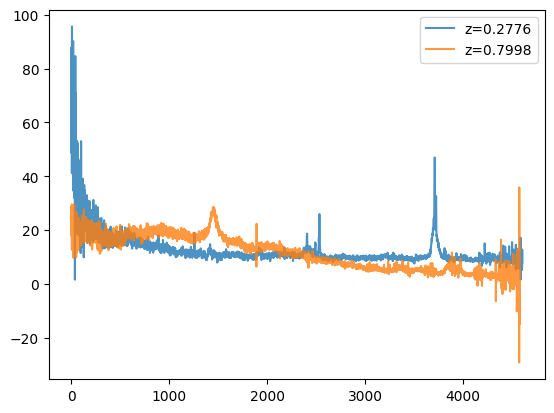

In [13]:
# Plot spectra for lowest and highest redshift
df_minz = df_train[df_train['Z_FIT']==df_train['Z_FIT'].min()]
df_maxz = df_train[df_train['Z_FIT']==df_train['Z_FIT'].max()]
data_minz = fits.getdata(Path(cfg['data_dir'], 'spectra', f"op-{df_minz['OBJID'].values[0]}.fits.gz"), ext=3)
data_maxz = fits.getdata(Path(cfg['data_dir'], 'spectra', f"op-{df_maxz['OBJID'].values[0]}.fits.gz"), ext=3)

plt.figure()
plt.plot(data_minz['flux_prereduced'], label=f"z={df_minz['Z_FIT'].values[0]:.4f}", alpha=0.8)
plt.plot(data_maxz['flux_prereduced'], label=f"z={df_maxz['Z_FIT'].values[0]:.4f}", alpha=0.8)
plt.legend()
plt.show()

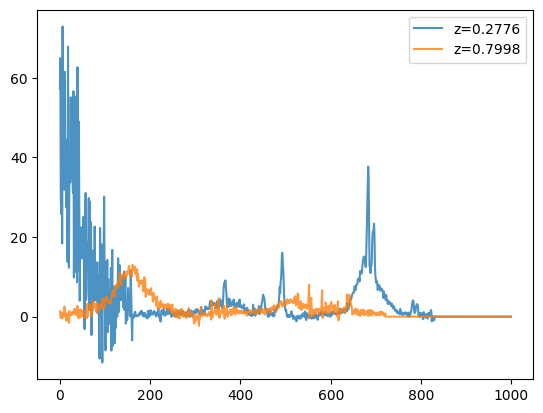

In [14]:
# Plot flux line for lowest and highest redshift
npixel = 1000
plt.figure()
plt.plot(data_minz['flux_line'][:npixel], label=f"z={df_minz['Z_FIT'].values[0]:.4f}", alpha=0.8)
plt.plot(data_maxz['flux_line'][:npixel], label=f"z={df_maxz['Z_FIT'].values[0]:.4f}", alpha=0.8)
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


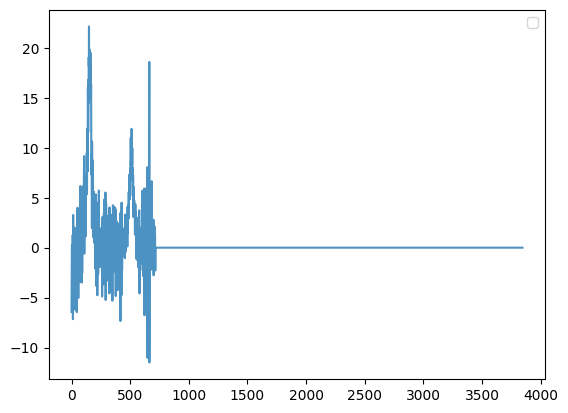

In [17]:
# Plot line flux
sample_n = 10
objid = SDSSQuasarSpecDataset.get_labelbyfilename(df, path_fits=list_files[sample_n])[0][0]
data = fits.getdata(Path(cfg['data_dir'], 'spectra', f"op-{objid}.fits.gz"), ext=3)
plt.figure()
plt.plot(data['flux_line'], alpha=0.8)
plt.legend()
plt.show()